In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
kohima_meteo = pd.read_csv('/kaggle/input/nagaland-aqi/Nagaland/Metrological Data/Kohima.csv', delimiter=',')
kohima_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,6.4,88,0.0,853.7,6.4,4.8,207,222
1,2024-01-01T01:00,6.8,86,0.0,854.8,5.5,3.1,203,201
2,2024-01-01T02:00,10.7,86,0.0,857.2,4.0,2.4,207,207
3,2024-01-01T03:00,13.6,71,0.0,859.0,1.9,2.3,22,18
4,2024-01-01T04:00,14.8,67,0.0,859.5,5.7,7.1,18,15
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,5.8,94,0.0,852.6,6.7,5.2,204,184
8780,2024-12-31T20:00,5.3,95,0.0,851.7,6.0,3.2,205,199
8781,2024-12-31T21:00,5.4,94,0.0,851.4,5.6,2.0,209,260
8782,2024-12-31T22:00,5.6,94,0.0,851.4,6.2,4.2,210,245


In [3]:
kohima_pollutants = pd.read_csv('/kaggle/input/nagaland-aqi/Nagaland/Pollutants/Kohima.csv', delimiter= ',')
kohima_pollutants['Timestamp'] = kohima_meteo['time']
kohima_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
kohima_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,19.52,30.50,2.10,2.84,5.24,2.00,76.50,0.29,10.60,...,50.0,11.96,69.26,0.38,52.15,1.53,1.53,2.07,850.01,NaN
1,2024-01-01T01:00,20.20,30.50,2.17,2.71,5.22,2.03,70.70,0.29,10.35,...,50.0,11.68,73.16,0.40,113.25,0.39,0.39,2.07,849.67,NaN
2,2024-01-01T02:00,15.52,24.00,2.14,2.70,5.18,2.03,67.37,0.28,10.68,...,50.0,11.40,70.60,0.61,154.65,0.00,0.00,2.07,849.38,NaN
3,2024-01-01T03:00,15.28,24.50,2.19,2.88,5.38,1.99,68.35,0.26,11.44,...,50.0,10.84,71.36,0.76,127.59,0.00,0.00,2.07,849.34,NaN
4,2024-01-01T04:00,13.00,23.00,2.11,2.70,5.14,2.04,66.73,0.22,11.65,...,50.0,10.60,72.63,0.46,136.16,0.00,0.00,2.07,849.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,77.53,153.50,2.17,2.57,5.04,2.04,42.89,0.82,7.12,...,50.0,12.20,80.72,0.58,69.01,0.00,0.00,2.07,849.79,NaN
8780,2024-12-31T20:00,72.36,120.37,2.14,2.74,5.17,2.06,42.68,0.79,7.76,...,50.0,12.26,82.28,0.94,229.86,0.00,0.00,2.07,850.27,NaN
8781,2024-12-31T21:00,70.74,108.42,2.18,2.68,5.16,2.11,42.73,0.74,7.98,...,50.0,11.64,84.53,1.21,111.42,0.00,0.00,2.07,850.43,NaN
8782,2024-12-31T22:00,56.28,89.64,2.02,2.88,5.12,2.16,42.66,0.64,8.27,...,50.0,11.22,81.80,1.18,136.32,0.00,0.00,2.07,850.13,NaN


In [4]:
kohima = pd.merge(kohima_meteo.iloc[:, :], kohima_pollutants.iloc[:, 0:3], on='time')
kohima

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,6.4,88,0.0,853.7,6.4,4.8,207,222,19.52,30.50
1,2024-01-01T01:00,6.8,86,0.0,854.8,5.5,3.1,203,201,20.20,30.50
2,2024-01-01T02:00,10.7,86,0.0,857.2,4.0,2.4,207,207,15.52,24.00
3,2024-01-01T03:00,13.6,71,0.0,859.0,1.9,2.3,22,18,15.28,24.50
4,2024-01-01T04:00,14.8,67,0.0,859.5,5.7,7.1,18,15,13.00,23.00
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,5.8,94,0.0,852.6,6.7,5.2,204,184,77.53,153.50
8780,2024-12-31T20:00,5.3,95,0.0,851.7,6.0,3.2,205,199,72.36,120.37
8781,2024-12-31T21:00,5.4,94,0.0,851.4,5.6,2.0,209,260,70.74,108.42
8782,2024-12-31T22:00,5.6,94,0.0,851.4,6.2,4.2,210,245,56.28,89.64


In [5]:
kohima['city'] = 'Kohima'
kohima

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,6.4,88,0.0,853.7,6.4,4.8,207,222,19.52,30.50,Kohima
1,2024-01-01T01:00,6.8,86,0.0,854.8,5.5,3.1,203,201,20.20,30.50,Kohima
2,2024-01-01T02:00,10.7,86,0.0,857.2,4.0,2.4,207,207,15.52,24.00,Kohima
3,2024-01-01T03:00,13.6,71,0.0,859.0,1.9,2.3,22,18,15.28,24.50,Kohima
4,2024-01-01T04:00,14.8,67,0.0,859.5,5.7,7.1,18,15,13.00,23.00,Kohima
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,5.8,94,0.0,852.6,6.7,5.2,204,184,77.53,153.50,Kohima
8780,2024-12-31T20:00,5.3,95,0.0,851.7,6.0,3.2,205,199,72.36,120.37,Kohima
8781,2024-12-31T21:00,5.4,94,0.0,851.4,5.6,2.0,209,260,70.74,108.42,Kohima
8782,2024-12-31T22:00,5.6,94,0.0,851.4,6.2,4.2,210,245,56.28,89.64,Kohima


In [6]:
kohima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8145 non-null   float64
 10  PM10 (µg/m³)              7977 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
kohima = kohima.interpolate()
kohima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    kohima[delay1_col] = kohima[col].shift(1)
    delay2_col = col + "_delay2"
    kohima[delay2_col] = kohima[col].shift(2)
    kohima.loc[0, delay1_col] = kohima[col].iloc[-1]
    kohima.loc[1, delay2_col] = kohima[col].iloc[-1]
    kohima.loc[0, delay2_col] = kohima[col].iloc[-2]

kohima

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,6.4,88,0.0,853.7,6.4,4.8,207,222,19.52,30.50,Kohima,36.85,56.28,67.16,89.64
1,2024-01-01T01:00,6.8,86,0.0,854.8,5.5,3.1,203,201,20.20,30.50,Kohima,19.52,36.85,30.50,67.16
2,2024-01-01T02:00,10.7,86,0.0,857.2,4.0,2.4,207,207,15.52,24.00,Kohima,20.20,19.52,30.50,30.50
3,2024-01-01T03:00,13.6,71,0.0,859.0,1.9,2.3,22,18,15.28,24.50,Kohima,15.52,20.20,24.00,30.50
4,2024-01-01T04:00,14.8,67,0.0,859.5,5.7,7.1,18,15,13.00,23.00,Kohima,15.28,15.52,24.50,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,5.8,94,0.0,852.6,6.7,5.2,204,184,77.53,153.50,Kohima,87.65,70.04,158.42,115.15
8780,2024-12-31T20:00,5.3,95,0.0,851.7,6.0,3.2,205,199,72.36,120.37,Kohima,77.53,87.65,153.50,158.42
8781,2024-12-31T21:00,5.4,94,0.0,851.4,5.6,2.0,209,260,70.74,108.42,Kohima,72.36,77.53,120.37,153.50
8782,2024-12-31T22:00,5.6,94,0.0,851.4,6.2,4.2,210,245,56.28,89.64,Kohima,70.74,72.36,108.42,120.37


In [9]:
nagaland_data = kohima
nagaland_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,6.4,88,0.0,853.7,6.4,4.8,207,222,19.52,30.50,Kohima,36.85,56.28,67.16,89.64
1,2024-01-01T01:00,6.8,86,0.0,854.8,5.5,3.1,203,201,20.20,30.50,Kohima,19.52,36.85,30.50,67.16
2,2024-01-01T02:00,10.7,86,0.0,857.2,4.0,2.4,207,207,15.52,24.00,Kohima,20.20,19.52,30.50,30.50
3,2024-01-01T03:00,13.6,71,0.0,859.0,1.9,2.3,22,18,15.28,24.50,Kohima,15.52,20.20,24.00,30.50
4,2024-01-01T04:00,14.8,67,0.0,859.5,5.7,7.1,18,15,13.00,23.00,Kohima,15.28,15.52,24.50,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,5.8,94,0.0,852.6,6.7,5.2,204,184,77.53,153.50,Kohima,87.65,70.04,158.42,115.15
8780,2024-12-31T20:00,5.3,95,0.0,851.7,6.0,3.2,205,199,72.36,120.37,Kohima,77.53,87.65,153.50,158.42
8781,2024-12-31T21:00,5.4,94,0.0,851.4,5.6,2.0,209,260,70.74,108.42,Kohima,72.36,77.53,120.37,153.50
8782,2024-12-31T22:00,5.6,94,0.0,851.4,6.2,4.2,210,245,56.28,89.64,Kohima,70.74,72.36,108.42,120.37


In [10]:
nagaland_data['city'] = nagaland_data['city'].astype('category')

In [11]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [12]:
X, y = nagaland_data[input_cols], nagaland_data[target_cols]

In [13]:
from xgboost import XGBRegressor

In [14]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=50,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [15]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
pred_check = model.predict(X)

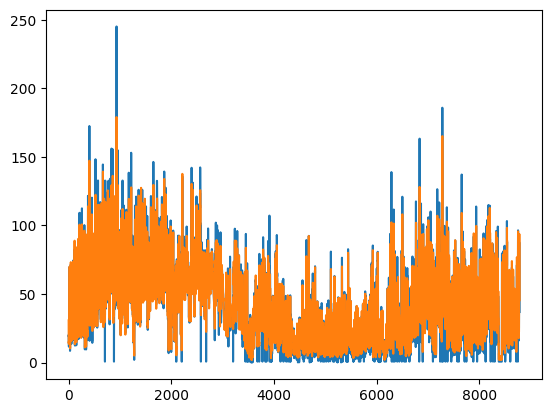

In [17]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.8928161364254658


In [19]:
import joblib
joblib.dump(model, 'Nagaland_PM2.5_µgm³.pkl')

['Nagaland_PM2.5_µgm³.pkl']

In [20]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
pred_check2 = model.predict(X)

In [22]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9095442510091624


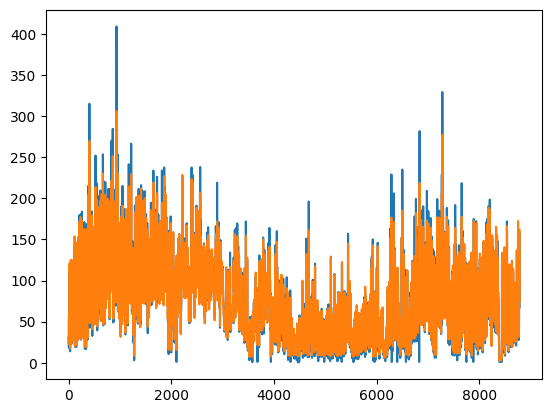

In [23]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [24]:
joblib.dump(model, 'Nagaland_PM10_µgm³.pkl')

['Nagaland_PM10_µgm³.pkl']